# Play Store Reviews Sentiment Analysis 

<br>

Training a `RandomForest` classifier model and analysis of 15 app reviews by scrapping 

<hr>
  <br>








<br>



In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [40]:
df = pd.read_csv("./playstore_datasets/user_reviews.csv")
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Remove the lines with blank values 

In [41]:
df.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)

## Feature Extraction 

As we are only interested in some of the features , we will only use those features

In [42]:
X = df['Translated_Review']
y = df['Sentiment']

## Train Test Split 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Vectorize the text 

In [44]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Training a sentiment classifier

In [45]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

## Calculating accureccy 

In [46]:
y_pred = clf.predict(X_test_tfidf)

In [47]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9090301896874166
              precision    recall  f1-score   support

    Negative       0.92      0.77      0.84      1653
     Neutral       0.82      0.90      0.86      1049
    Positive       0.93      0.96      0.94      4784

    accuracy                           0.91      7486
   macro avg       0.89      0.88      0.88      7486
weighted avg       0.91      0.91      0.91      7486



# Checking the sentiment of apps that we scrapped 

### Loading the Pickle file

In [48]:
import pickle

with open('app_reviews_list.pkl', 'rb') as f:
    app_reviews_list = pickle.load(f)

In [49]:
len(app_reviews_list)

15

In [50]:
len(app_reviews_list[0])

1199

In [51]:
app_reviews_list[0].head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,1,11,4.16.6.2,2020-07-22 18:43:10,Our team will be happy to look into it for you...,2020-07-23 22:02:02,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",1,8,None,2020-12-08 11:54:40,We are not aware of any issues with randomized...,2020-12-10 15:08:20,None,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,1,6,5.11.1.2,2021-07-09 19:21:56,Sorry to hear that! It sounds like you might h...,2021-07-11 16:46:55,5.11.1.2,most_relevant,com.anydo


### Filtering out only the comments

In [52]:
filtered_dfs = []

for app_reviews_df in app_reviews_list:
    filtered_dfs.append(app_reviews_df[['content']])

In [53]:
len(filtered_dfs)

15

In [54]:
len(filtered_dfs[0])

1199

In [55]:
filtered_dfs[0].head()

,content
0,I have the same recurring tasks to do every da...
1,"Instead of shopping around, I downloaded Any.d..."
2,Why does every once in a while... out of the b...
3,Terrible Update! This app used to be perfect f...
4,This app is deceivingly terrible. There are so...


### Function for sentiment count 

In [66]:
def count_sentiments(df):
    X_df_tfidf = vectorizer.transform(df['content'])

    predicted_sentiments = np.array(clf.predict(X_df_tfidf))
    
    positive_count = np.sum(predicted_sentiments == 'Positive')
    negative_count = np.sum(predicted_sentiments == 'Negative')

    return positive_count, negative_count

### Finally checking the sentiment of all the apps

In [68]:
sentiment = []

for filtered_df in filtered_dfs:
    (pos , neg) = count_sentiments(filtered_df)
    sentiment.append((pos,neg))


In [69]:
len(sentiment)

15

In [70]:
sentiment

[(966, 91),
 (1022, 75),
 (1012, 71),
 (1031, 81),
 (1007, 61),
 (1012, 63),
 (512, 39),
 (982, 84),
 (959, 92),
 (999, 65),
 (1006, 87),
 (521, 35),
 (1003, 77),
 (1023, 75),
 (935, 93)]

# Visualizing The Analysis of Our 15 apps

In [71]:
apps = pd.read_csv('./apps.csv')

In [72]:
len(apps)

15

In [73]:
apps.head(1)

,Unnamed: 0,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,...,contentRating,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,updated,version,appId,url
0,0,Any.do - To do list & Calendar,"🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,30109030,4.410624,481461,...,Everyone,NaN,False,False,"Nov 10, 2011","Mar 17, 2024",1710690156,NaN,com.anydo,https://play.google.com/store/apps/details?id=...


In [107]:
sentiment[3][0], sentiment[3][1]

(1031, 81)

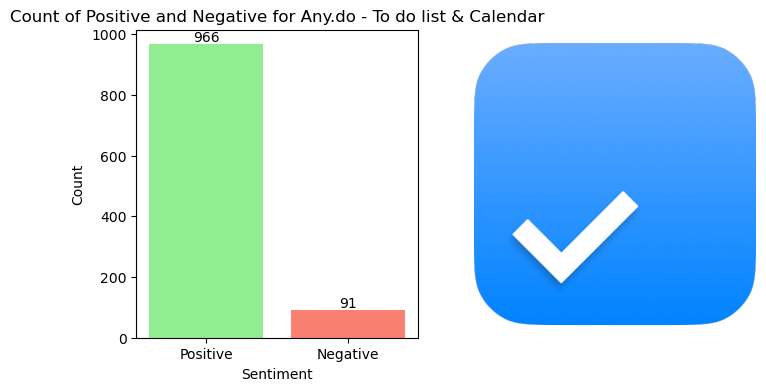

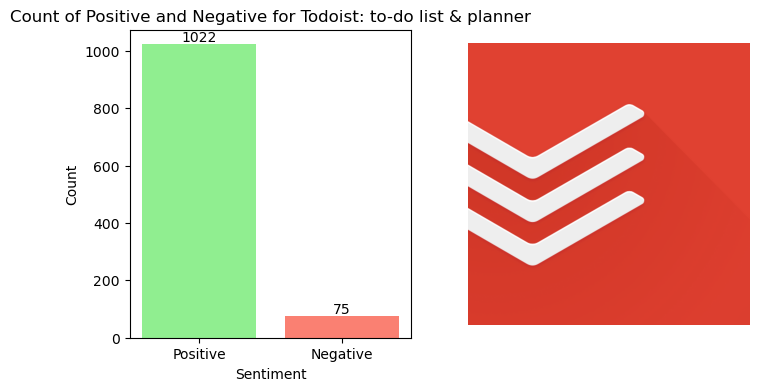

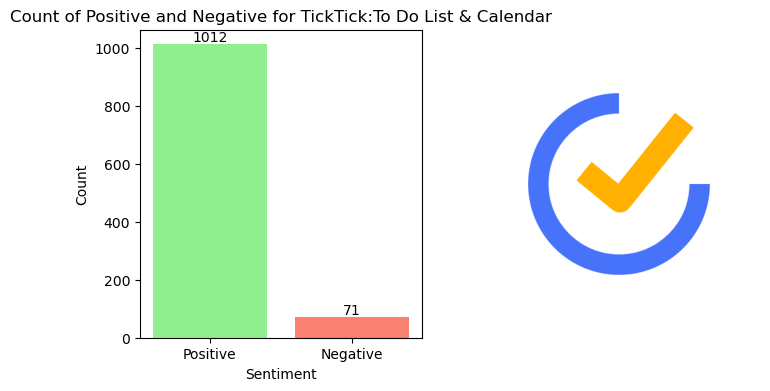

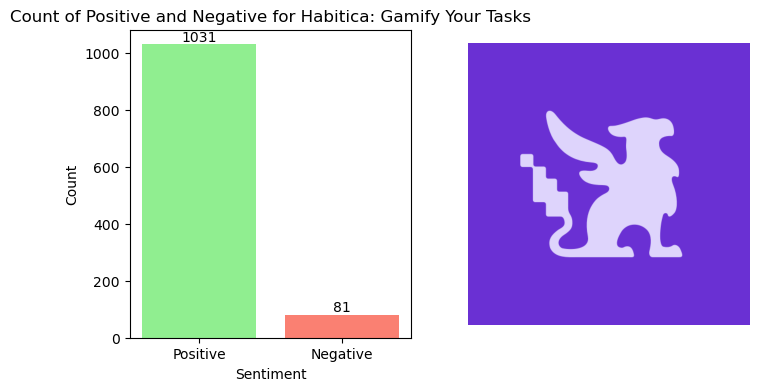

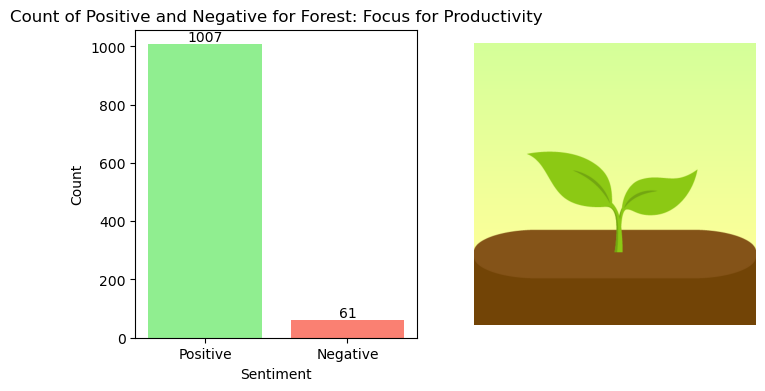

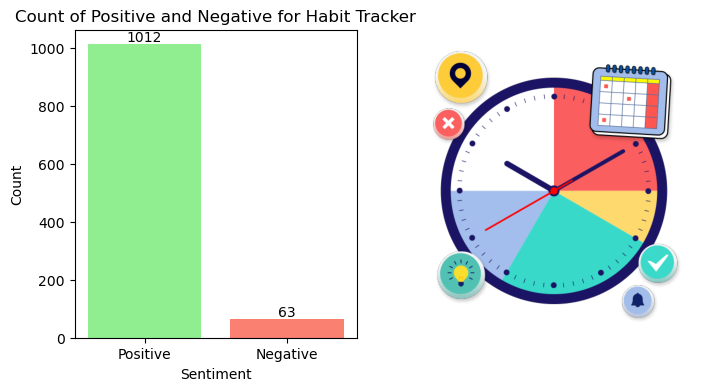

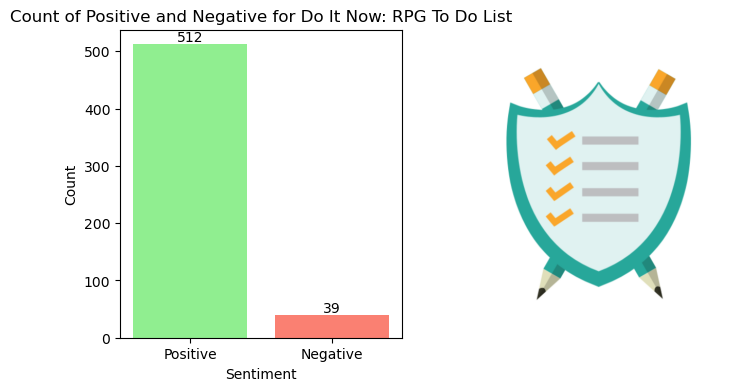

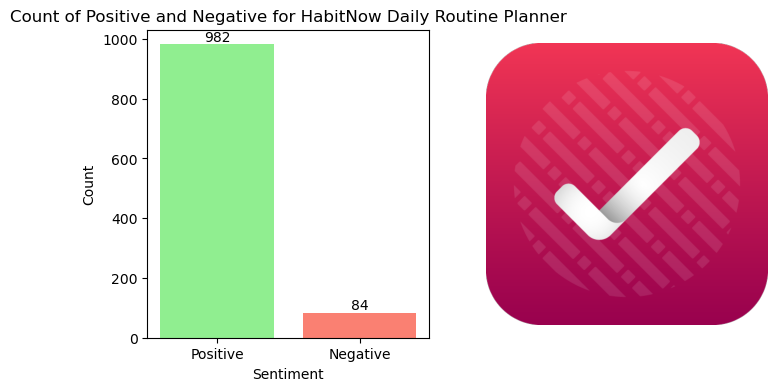

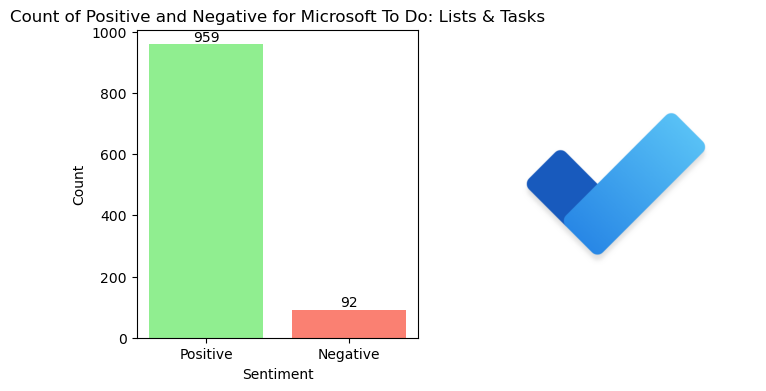

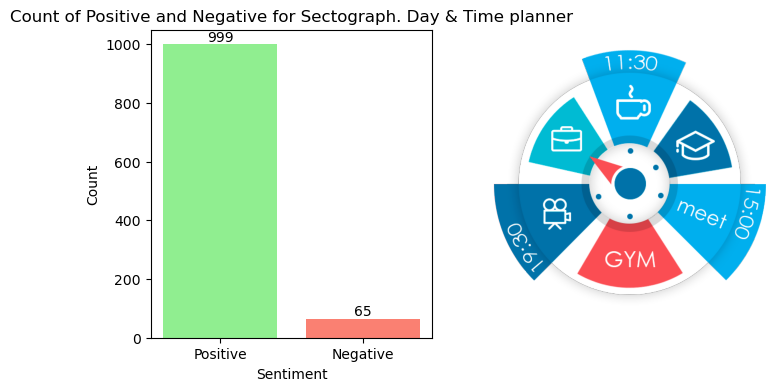

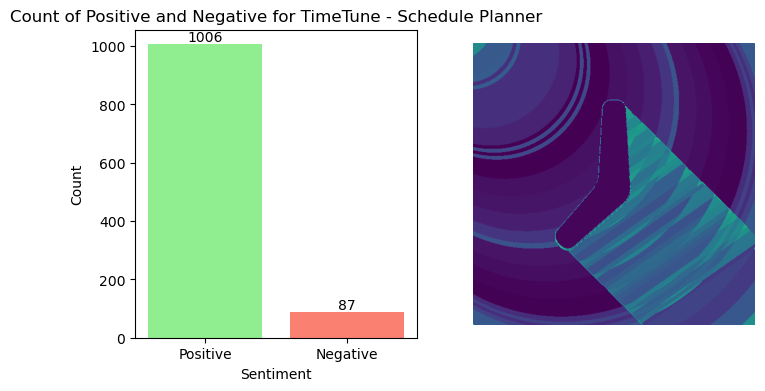

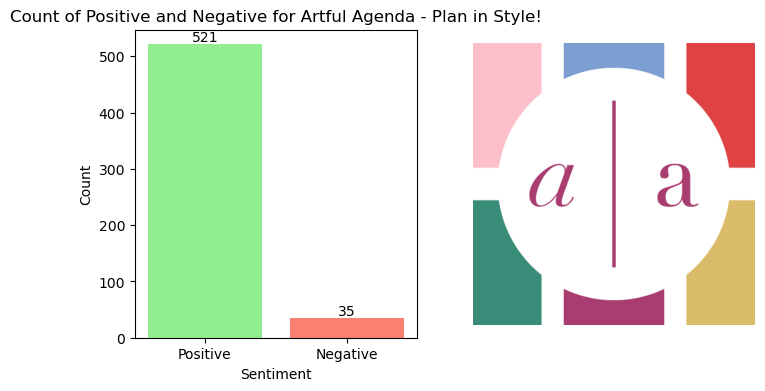

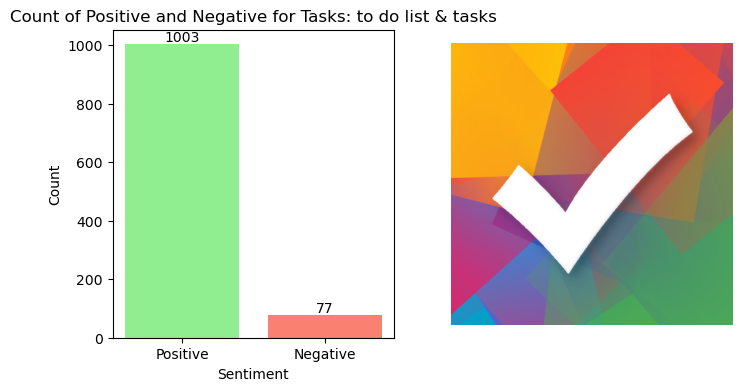

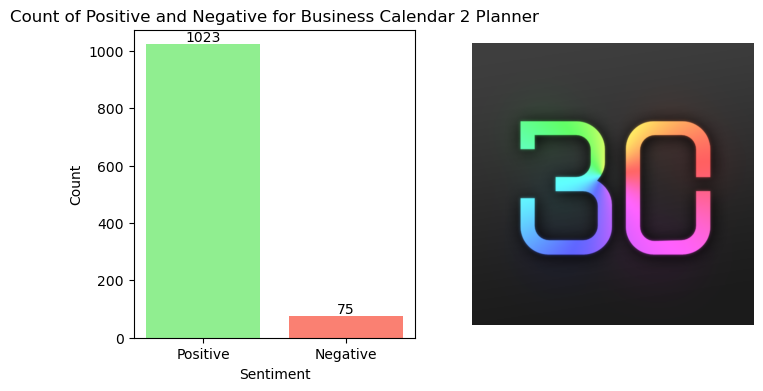

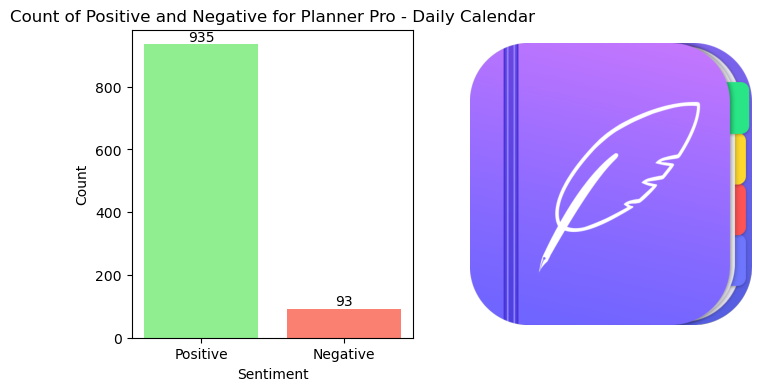

In [108]:
for i in range(15):
    labels = ['Positive', 'Negative']
    counts = [sentiment[i][0], sentiment[i][1]]
    
    # Create a grid of subplots with one row and two columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))
    
    # Plot the bar graph on the first subplot
    bars = ax1.bar(labels, counts, color=['lightgreen', 'salmon'])
    ax1.set_xlabel('Sentiment')
    ax1.set_ylabel('Count')
    ax1.set_title('Count of Positive and Negative for ' + apps["title"][i])
    
    # Add text labels with the number values of the bars
    for bar, count in zip(bars, counts):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')
    
    # Load the image from the internet URL
    url = apps["icon"][i]
    response = requests.get(url)
    icon_image = Image.open(BytesIO(response.content))
    
    # Display the icon image on the second subplot
    ax2.imshow(np.array(icon_image))
    ax2.axis('off')  # Turn off axis for the image subplot
    
    plt.show()